In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

In [2]:
df = pd.read_csv('data.csv', on_bad_lines='skip')
df = df[['review_type', 'review_content']].rename(columns={'review_type': 'label', 'review_content': 'text'})
df['label'] = df['label'].map({'Fresh': 0, 'Rotten': 1})
df = df.dropna()

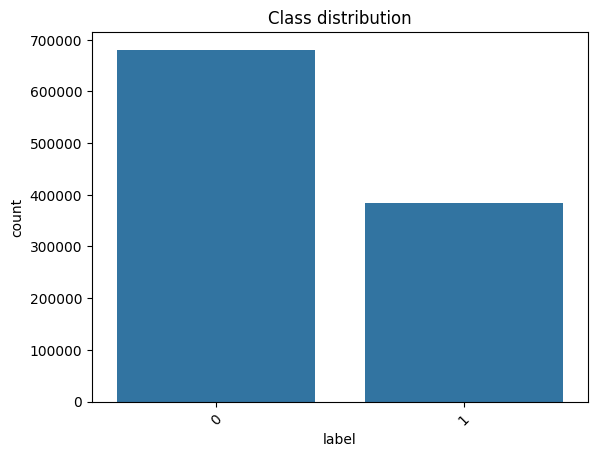

In [3]:
sns.countplot(data=df, x='label')
plt.xticks(rotation=45)
plt.title('Class distribution')
plt.show()

<Axes: xlabel='text_length', ylabel='Count'>

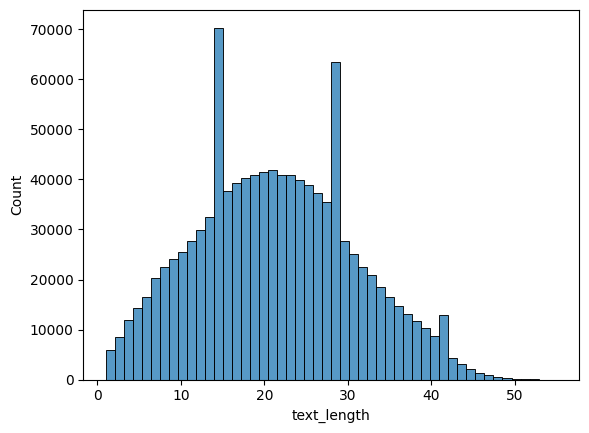

In [4]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['text_length'], bins=50)

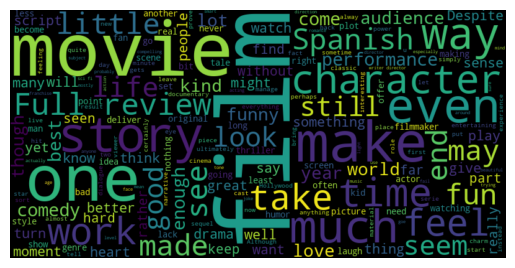

In [5]:
text = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
def top_tfidf(df, label, ngram=1):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=3000, ngram_range=(ngram, ngram))
    X = vectorizer.fit_transform(df[df['label'] == label]['text'])
    tfidf_means = X.mean(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    
    tfidf_df = pd.DataFrame({'word': vocab, 'tfidf': tfidf_means})
    top_n = tfidf_df.sort_values(by='tfidf', ascending=False).head(30)
    
    plt.figure(figsize=(12, 6))
    plt.barh(top_n['word'][::-1], top_n['tfidf'][::-1])
    plt.title('class ' + str(label))
    plt.xlabel('Average TF-IDF')
    plt.tight_layout()
    plt.show()
    

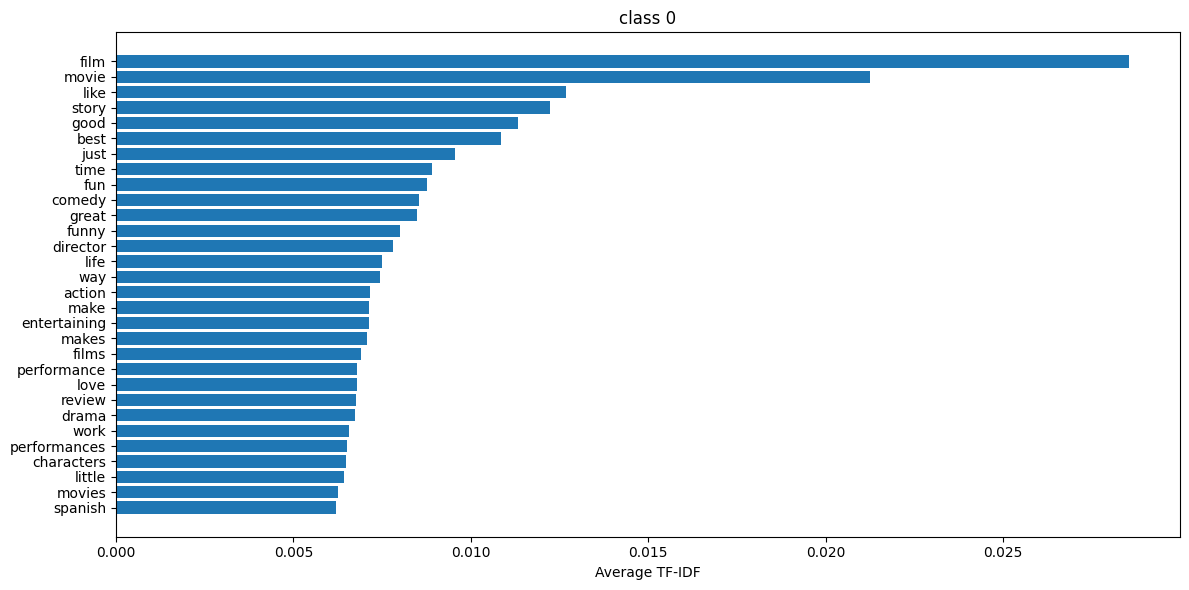

In [7]:
top_tfidf(df, 0, 1)

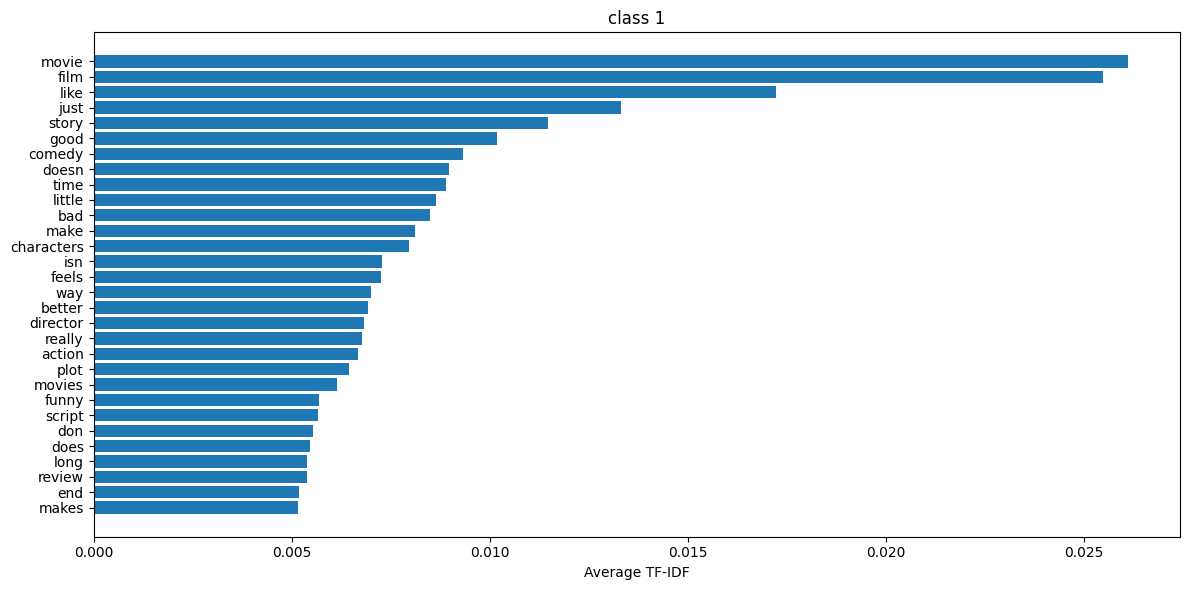

In [8]:
top_tfidf(df, 1, 1)

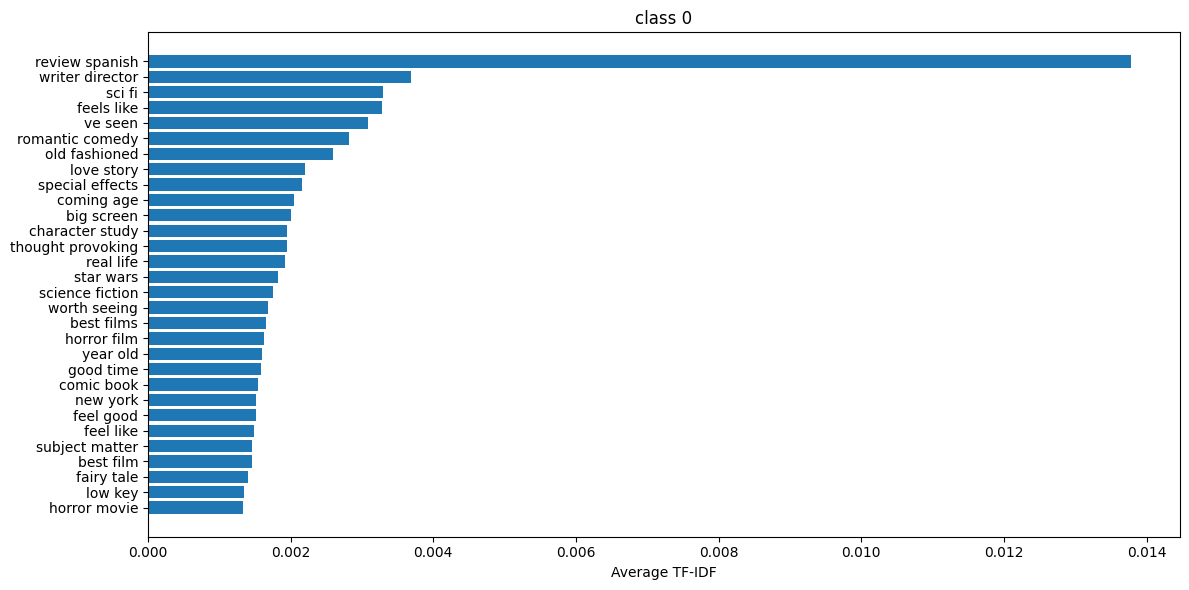

In [9]:
top_tfidf(df, 0, 2)

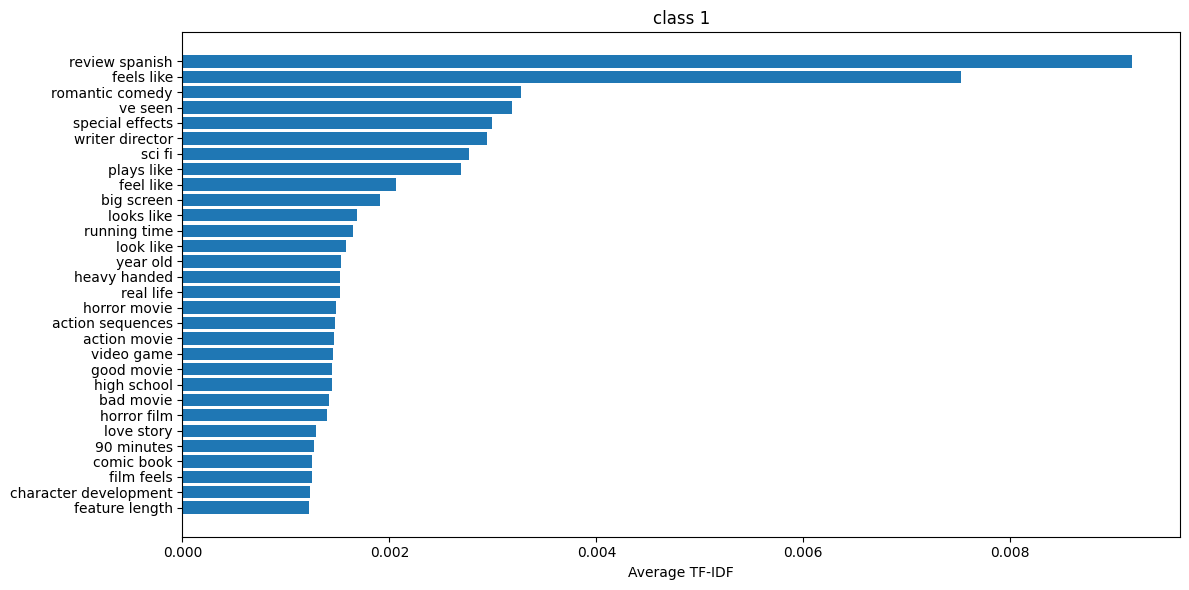

In [10]:
top_tfidf(df, 1, 2)

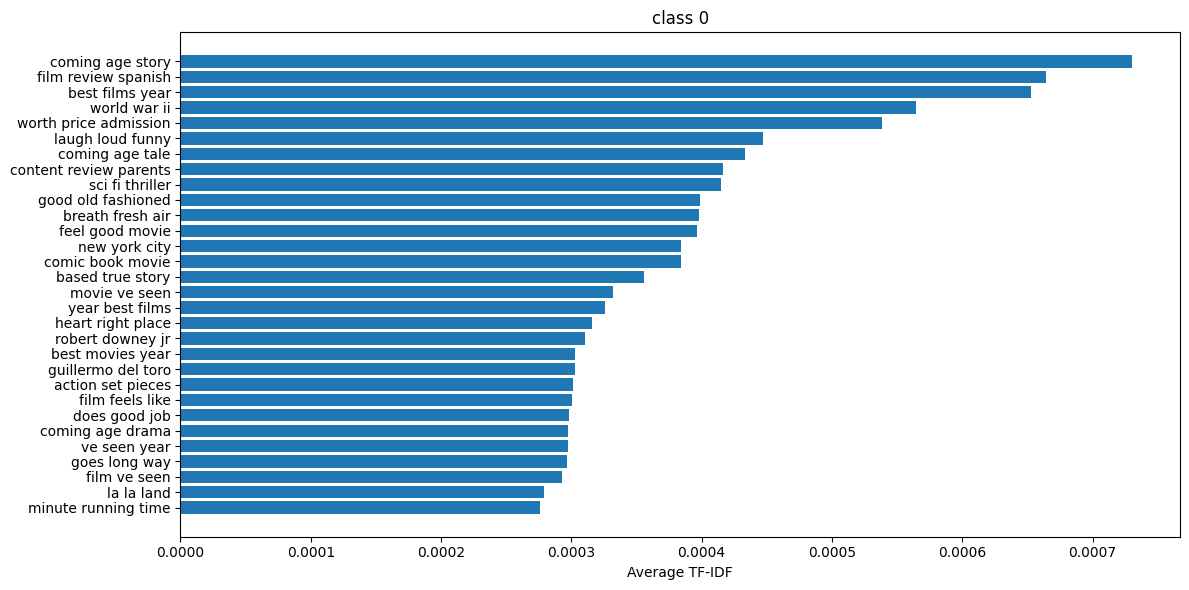

In [11]:
top_tfidf(df, 0, 3)

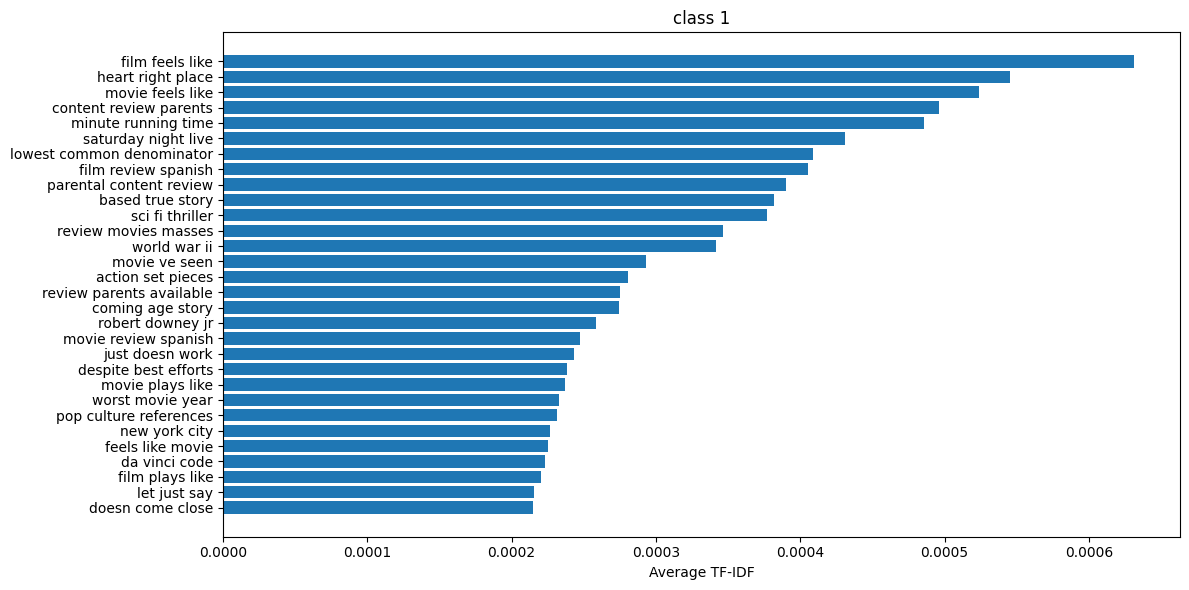

In [12]:
top_tfidf(df, 1, 3)